In [23]:
%matplotlib inline
import numpy as np
from dipole import Hertz_dipole_ff, Magnetic_dipole_ff
import matplotlib.pyplot as plt


nt = 11 # number of theta points
nphi = 10 # number of phi points
T = 1/1e8 # period 
r0 = 1 # radius at which to plot E and B

In [24]:
def generate_xyz_EB(nt, nphi, p, R, f, t, phase, phi_max = 2*np.pi, theta_max = np.pi):

    theta=np.arccos(2*np.linspace(0,1,nt)-1) 
    phi=np.linspace(2*np.pi/nphi,2*np.pi,nphi)
    
    theta = theta[theta <= theta_max]
    phi = phi[phi <= phi_max]

    th_phi = np.meshgrid(theta, phi)
    thetas = th_phi[0].flatten()
    phis = th_phi[1].flatten()

    x = r0*np.sin(thetas)*np.cos(phis)
    y = r0*np.sin(thetas)*np.sin(phis)
    z = r0*np.cos(thetas)

    E = np.zeros((3, len(x)))
    B = np.zeros((3, len(x)))

    for j1 in np.arange(0, len(x)):
      El, Bl = Hertz_dipole_ff(np.array([x[j1], y[j1], z[j1]]), p, R, phase, f, t=t)
      E[:, j1] = El[:,0]
      B[:, j1] = Bl[:,0]

    return x, y, z, E, B

<ipython-input-24-4dcdd88c5e9d>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  E[:, j1] = El[:,0]
<ipython-input-24-4dcdd88c5e9d>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  B[:, j1] = Bl[:,0]


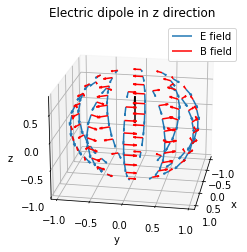

In [25]:
p = np.array([[0, 0, 1e-8]])
R = np.array([[0,0,0]])
f = np.array([1e8])
t = 0
phase = np.array([0])

x, y, z, E, B = generate_xyz_EB(nt, nphi, p, R, f, t, phase)

E_max_mag = max(np.sqrt(sum(E**2, 0)))
B_max_mag = max(np.sqrt(sum(B**2, 0)))

scale_E = 1e-3*r0
scale_B = 1e-3*r0*E_max_mag/B_max_mag

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(0, 0, 0, 0, 0, 0.1, length=5, color='black')
ax.quiver(x, y, z, *E, length=scale_E, label='E field')
ax.quiver(x, y, z, *B, length=scale_B, color='red', label='B field')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=20., azim=10)
plt.title('Electric dipole in z direction')
plt.legend()
plt.show()

<ipython-input-24-4dcdd88c5e9d>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  E[:, j1] = El[:,0]
<ipython-input-24-4dcdd88c5e9d>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  B[:, j1] = Bl[:,0]


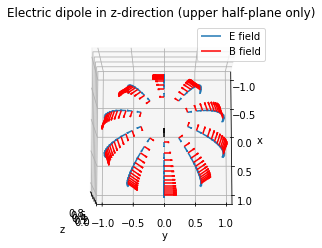

In [26]:
nt=30

x, y, z, E, B = generate_xyz_EB(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi/2)


E_max_mag = max(np.sqrt(sum(E**2, 0)))
B_max_mag = max(np.sqrt(sum(B**2, 0)))

scale_E = 1e-3*r0
scale_B = 1e-3*r0*E_max_mag/B_max_mag


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(0, 0, 0, 0, 0, 0.1, length=5, color='black')
ax.quiver(x, y, z, *E, length=scale_E, label='E field')
ax.quiver(x, y, z, *B, length=scale_B, color='red', label='B field')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=80., azim=0)
plt.title('Electric dipole in z-direction (upper half-plane only)')
plt.legend()
plt.show()

<ipython-input-24-4dcdd88c5e9d>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  E[:, j1] = El[:,0]
<ipython-input-24-4dcdd88c5e9d>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  B[:, j1] = Bl[:,0]


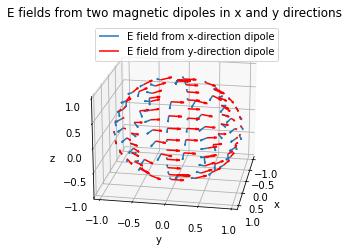

In [29]:
nt=11

T = 1/1e8

p = np.array([[1e-8, 0, 0]])
R = np.array([[0,0,0]])
f = np.array([1e8])
t = T/2
phi = np.array([0])

x, y, z, Ex, Bx = generate_xyz_EB(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi)

p = np.array([[0, 1e-8, 0]])

x, y, z, Ey, By = generate_xyz_EB(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi)

E_max_mag = max(np.sqrt(sum(E**2, 0)))
B_max_mag = max(np.sqrt(sum(B**2, 0)))

scale_E = 1e-3*r0
scale_B = 1e-3*r0*E_max_mag/B_max_mag

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, *Ex, length=scale_E, label='E field from x-direction dipole')
ax.quiver(x, y, z, *Ey, length=scale_E, color='red', label='E field from y-direction dipole')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=20., azim=10)
plt.title('E fields from two magnetic dipoles in x and y directions')
plt.legend()
plt.show()

<ipython-input-24-4dcdd88c5e9d>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  E[:, j1] = El[:,0]
<ipython-input-24-4dcdd88c5e9d>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  B[:, j1] = Bl[:,0]


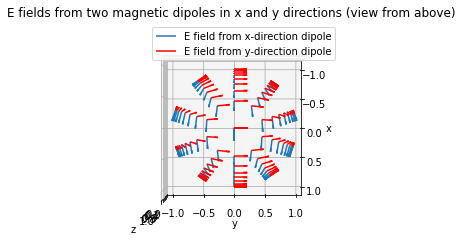

In [33]:
nt=21

T = 1/1e8

p = np.array([[1e-8, 0, 0]])
R = np.array([[0,0,0]])
f = np.array([1e8])
t = T/2
phi = np.array([0])

x, y, z, Ex, Bx = generate_xyz_EB(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi/2)

p = np.array([[0, 1e-8, 0]])

x, y, z, Ey, By = generate_xyz_EB(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi/2)

E_max_mag = max(np.sqrt(sum(E**2, 0)))
B_max_mag = max(np.sqrt(sum(B**2, 0)))

scale_E = 1e-3*r0
scale_B = 1e-3*r0*E_max_mag/B_max_mag

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, *Ex, length=scale_E, label='E field from x-direction dipole')
ax.quiver(x, y, z, *Ey, length=scale_E, color='red', label='E field from y-direction dipole')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90., azim=0)
plt.title('E fields from two magnetic dipoles in x and y directions (view from above)')
plt.legend()
plt.show()

<ipython-input-24-4dcdd88c5e9d>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  E[:, j1] = El[:,0]
<ipython-input-24-4dcdd88c5e9d>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  B[:, j1] = Bl[:,0]


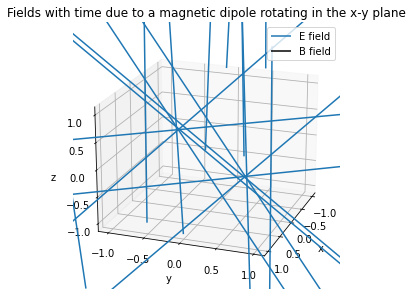

<ipython-input-34-9b6db7359646>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  E[:, j1] = El[:, 0]
<ipython-input-34-9b6db7359646>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  B[:, j1] = Bl[:, 0]


In [34]:
import numpy as np
from dipole import Magnetic_dipole_ff
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


def update_quiver(i, Q1, Q2, x, y, z, scale, scale_B):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    p = np.array([[1e-8, 0, 0], [0, 1e-8, 0]])
    R = np.array([[0, 0, 0], [0, 0, 0]])
    f = np.array([1e8, 1e8])
    t = 2.5e-10*i
    phi = np.array([0, np.pi / 2])

    E = np.zeros((3, len(x)))
    B = np.zeros((3, len(x)))

    for j1 in np.arange(0, len(x)):
        El, Bl = Magnetic_dipole_ff(np.array([x[j1], y[j1], z[j1]]), p, R, phi, f, t=t)
        E[:, j1] = El[:, 0]
        B[:, j1] = Bl[:, 0]

    segments = (x, y, z, x + scale*E[0], y + scale*E[1], z + scale*E[2])
    segments = np.array(segments).reshape(6, -1)
    new_segs = [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]


    Q1.set_segments(new_segs)

    segments = (x, y, z, x + scale_B*B[0], y + scale_B*B[1], z + scale_B*B[2])
    segments = np.array(segments).reshape(6, -1)
    new_segs = [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

    Q2.set_segments(new_segs)

    return Q1, Q2

nt = 11
nph = 10

T = 1 / 1e8

p = np.array([[1e-8, 0, 0], [0, 1e-8, 0]])
R = np.array([[0, 0, 0], [0, 0, 0]])
f = np.array([1e8, 1e8])
t = 0
phi = np.array([0, np.pi/2])

x, y, z, E, B = generate_xyz_EB(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi)

fig = plt.figure(1)
ax = fig.gca(projection='3d')
Q1 = ax.quiver(x, y, z, *E, pivot='middle', label='E field')
Q2 = ax.quiver(x, y, z, *B, pivot='middle', color='black', label='B field')

ax.set_xlim(-1.1*r0, 1.1*r0)
ax.set_ylim(-1.1*r0, 1.1*r0)
ax.set_zlim(-1.1*r0, 1.1*r0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


scale = r0/2000
scale_B = (E_max_mag/B_max_mag)*scale
# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = FuncAnimation(fig, update_quiver, fargs=(Q1, Q2, x, y, z, scale, scale_B),
                               interval=100, blit=False)
ax.view_init(elev=20., azim=20)
fig.tight_layout()
plt.legend()
plt.title('Fields with time due to a magnetic dipole rotating in the x-y plane')
plt.show()


HTML(anim.to_html5_video())